# Comparing Performance of Financial Instruments

### Which instruments performed best/worst in the past in terms of risk & return?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
close = pd.read_csv("close.csv", index_col="Date", parse_dates=["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,^DJI
Date,,,,,
2014-10-21 00:00:00+00:00,127.120003,386.475006,1.279525,1251.000000,16614.810547
2014-10-22 00:00:00+00:00,121.449997,383.157990,1.271472,1244.800049,16461.320312
2014-10-23 00:00:00+00:00,122.029999,358.416992,1.264143,1228.500000,16677.900391
2014-10-24 00:00:00+00:00,122.239998,358.345001,1.265406,1231.199951,16805.410156
2014-10-25 00:00:00+00:00,NaN,347.270996,NaN,NaN,NaN
...,...,...,...,...,...
2024-10-16 00:00:00+00:00,154.899994,67612.718750,1.088412,2674.000000,43077.699219
2024-10-17 00:00:00+00:00,155.309998,67399.835938,1.086248,2691.000000,43239.050781
2024-10-18 00:00:00+00:00,155.000000,68418.789062,1.082954,2713.699951,43275.910156


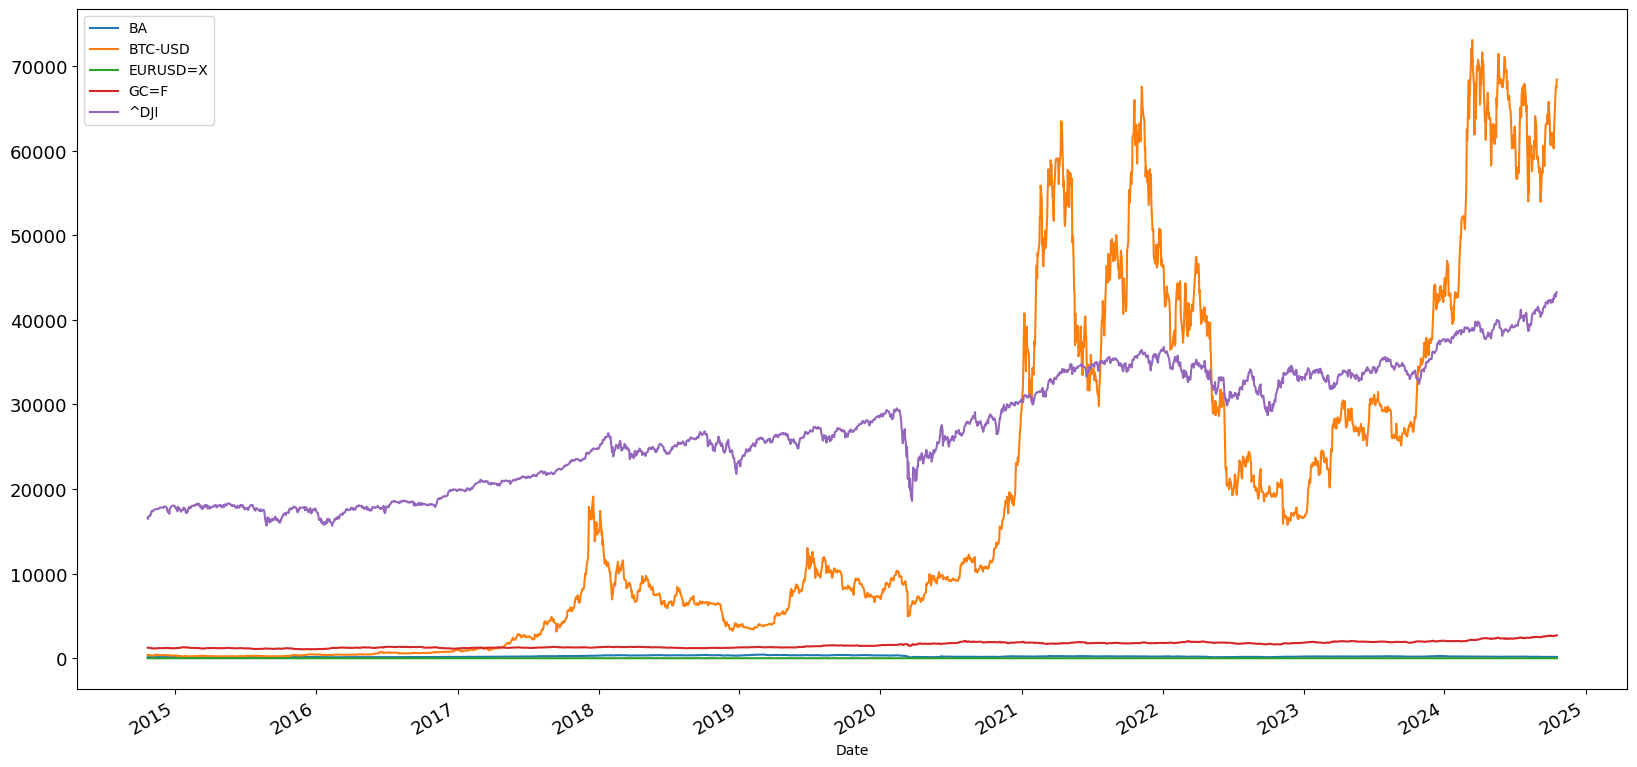

In [3]:
close.dropna().plot(figsize=(20, 10), fontsize=13)
plt.show()

In [5]:
# Apply function for each column to remove Nan
close.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2014-10-21 00:00:00+00:00 to 2024-10-20 00:00:00+00:00
Freq: D
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        2515 non-null   float64
 1   BTC-USD   3652 non-null   float64
 2   EURUSD=X  2604 non-null   float64
 3   GC=F      2512 non-null   float64
 4   ^DJI      2515 non-null   float64
dtypes: float64(5)
memory usage: 171.2 KB


In [6]:
# Calculate log returns
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,BTC-USD,EURUSD=X,GC=F,^DJI
Date,,,,,
2014-10-21 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2014-10-22 00:00:00+00:00,-0.045629,-0.008620,-0.006314,-0.004968,-0.009281
2014-10-23 00:00:00+00:00,0.004764,-0.066750,-0.005781,-0.013181,0.013071
2014-10-24 00:00:00+00:00,0.001719,-0.000201,0.000999,0.002195,0.007616
2014-10-25 00:00:00+00:00,NaN,-0.031391,NaN,NaN,NaN
...,...,...,...,...,...
2024-10-16 00:00:00+00:00,0.016599,0.008490,-0.002299,0.004723,0.007860
2024-10-17 00:00:00+00:00,0.002643,-0.003154,-0.001990,0.006337,0.003739
2024-10-18 00:00:00+00:00,-0.001998,0.015005,-0.003037,0.008400,0.000852


In [7]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2014-10-21 00:00:00+00:00 to 2024-10-20 00:00:00+00:00
Freq: D
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        2515 non-null   float64
 1   BTC-USD   3652 non-null   float64
 2   EURUSD=X  2604 non-null   float64
 3   GC=F      2512 non-null   float64
 4   ^DJI      2515 non-null   float64
dtypes: float64(5)
memory usage: 171.2 KB


In [8]:
returns.describe()

,BA,BTC-USD,EURUSD=X,GC=F,^DJI
count,2515.000000,3652.000000,2604.000000,2512.000000,2515.000000
mean,0.000079,0.001420,-0.000064,0.000308,0.000381
std,0.025369,0.036606,0.004984,0.009272,0.011072
min,-0.272444,-0.464730,-0.028144,-0.051069,-0.138418
25%,-0.010119,-0.012564,-0.002978,-0.004239,-0.003787
50%,0.000291,0.001366,-0.000085,0.000366,0.000719
75%,0.010711,0.016535,0.002812,0.005317,0.005404
max,0.217677,0.225119,0.028145,0.057775,0.107643


In [17]:
summary = returns.agg(["mean", "std"]).T
summary

,mean,std
BA,0.000079,0.025369
BTC-USD,0.001420,0.036606
EURUSD=X,-0.000064,0.004984
GC=F,0.000308,0.009272
^DJI,0.000381,0.011072


In [18]:
summary.columns = ["Mean", "Std"]
summary

,Mean,Std
BA,0.000079,0.025369
BTC-USD,0.001420,0.036606
EURUSD=X,-0.000064,0.004984
GC=F,0.000308,0.009272
^DJI,0.000381,0.011072


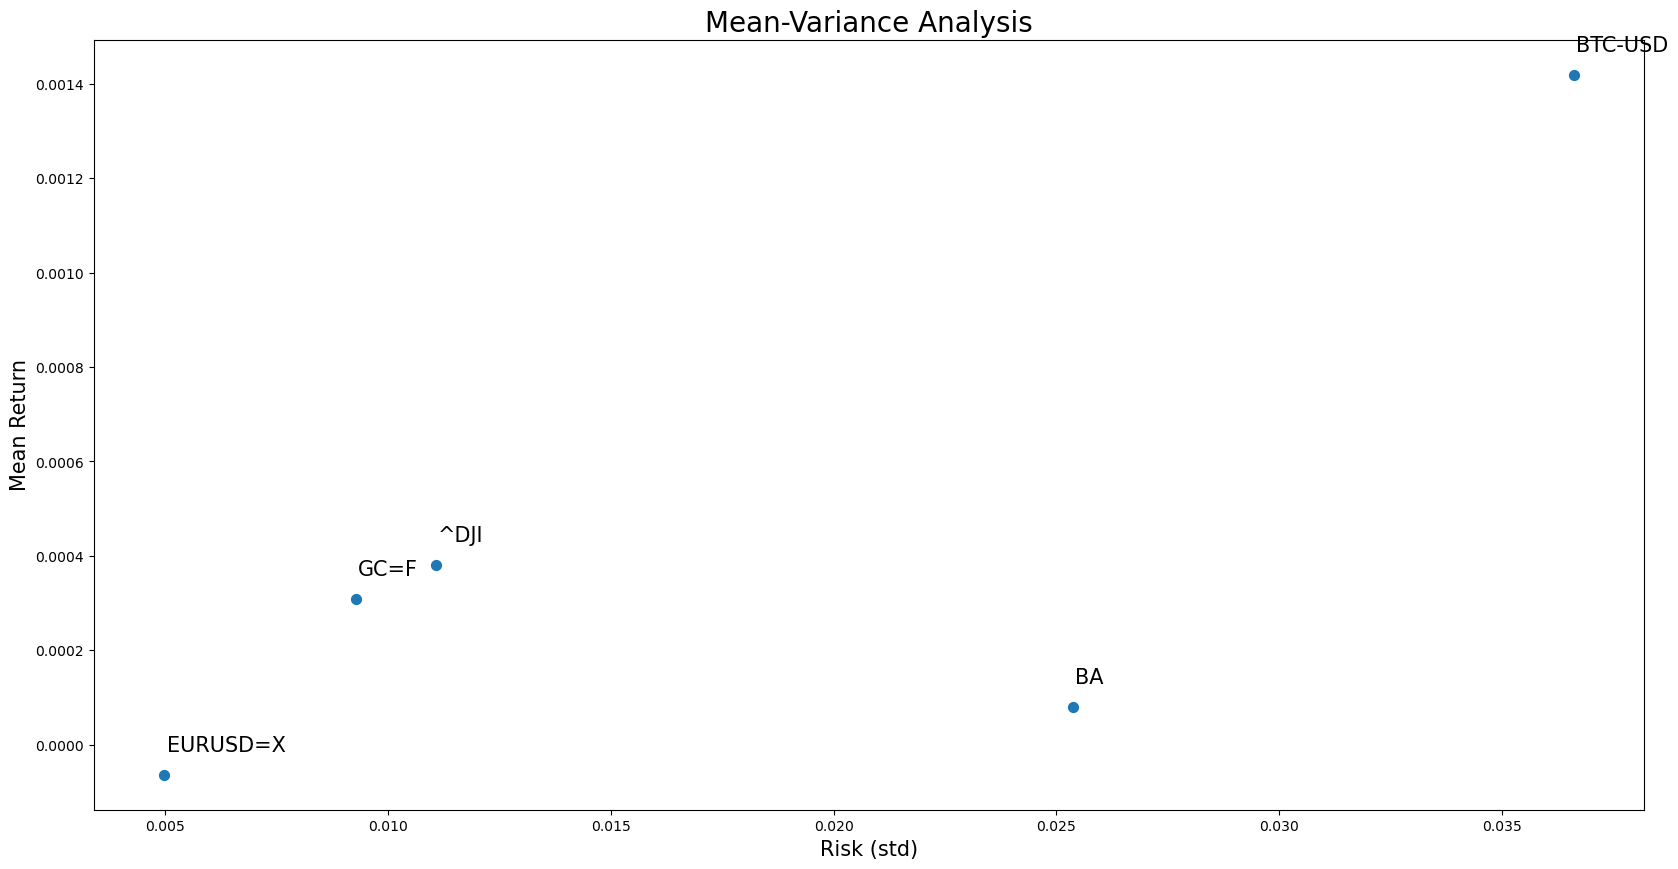

In [19]:
summary.plot(kind="scatter", x="Std", y="Mean", figsize=(20, 10), s=50)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00005, summary.loc[i, "Mean"]+0.00005), size=15)
plt.xlabel("Risk (std)", fontsize=15)
plt.ylabel("Mean Return", fontsize=15)
plt.title("Mean-Variance Analysis", fontsize=20)
plt.show()